In [1]:
import time
import xarray as xr
import numpy as np
from xcube.core.geocoded import reproject_dataset, compute_output_geom
from xcube.core.sentinel3 import open_sentinel3_product

#from dask.distributed import Client
#client = None

In [2]:
#if client is not None:
#    client.close()

In [3]:
#client = Client()

In [4]:
path = 'C:\\Users\\Norman\\Downloads\\S3B_OL_1_EFR____20190728T103451_20190728T103751_20190729T141105_0179_028_108_1800_LN1_O_NT_002.SEN3'

Open a Sentinel-3 OLCI L1b product:

In [5]:
src_ds = open_sentinel3_product(path)

Preload x,y coordinates so we are faster:

In [6]:
src_ds.longitude.load()
src_ds.latitude.load()
src_ds

<xarray.Dataset>
Dimensions:         (columns: 4865, rows: 4091)
Dimensions without coordinates: columns, rows
Data variables:
    longitude       (rows, columns) float64 -10.55 -10.54 -10.53 ... 12.07 12.07
    latitude        (rows, columns) float64 73.35 73.35 73.35 ... 59.96 59.96
    Oa02_radiance   (rows, columns) float32 ...
    Oa06_radiance   (rows, columns) float32 ...
    Oa09_radiance   (rows, columns) float32 ...
    Oa11_radiance   (rows, columns) float32 ...
    Oa17_radiance   (rows, columns) float32 ...
    Oa08_radiance   (rows, columns) float32 ...
    Oa10_radiance   (rows, columns) float32 ...
    Oa18_radiance   (rows, columns) float32 ...
    Oa14_radiance   (rows, columns) float32 ...
    Oa13_radiance   (rows, columns) float32 ...
    Oa16_radiance   (rows, columns) float32 ...
    Oa21_radiance   (rows, columns) float32 ...
    Oa01_radiance   (rows, columns) float32 ...
    detector_index  (rows, columns) float32 ...
    Oa12_radiance   (rows, columns) float32 ...
    Oa05_radiance   (rows, columns) float32 ...
    Oa19_radiance   (rows, columns) float32 ...
    Oa07_radiance   (rows, columns) float32 ...
    quality_flags   (rows, columns) uint32 ...
    Oa15_radiance   (rows, columns) float32 ...
    Oa20_radiance   (rows, columns) float32 ...
    Oa04_radiance   (rows, columns) float32 ...
    Oa03_radiance   (rows, columns) float32 ...

If `tile_size` is given, the reprojected data variables will be lazy dask arrays:

In [7]:
t1 = time.perf_counter()
dst_ds = reproject_dataset(src_ds, var_names='Oa13_radiance', tile_size=(1024, 2048))
t2 = time.perf_counter()

In [8]:
t2 - t1

4.0596228

In [9]:
dst_ds

<xarray.Dataset>
Dimensions:        (latitude: 7386, longitude: 20259)
Coordinates:
  * longitude      (longitude) float64 -11.92 -11.92 -11.92 ... 24.82 24.82
  * latitude       (latitude) float64 59.96 59.96 59.96 ... 73.35 73.35 73.35
Data variables:
    Oa13_radiance  (latitude, longitude) float32 dask.array<chunksize=(1024, 2048), meta=np.ndarray>

In [10]:
dst_ds.Oa13_radiance

<xarray.DataArray 'Oa13_radiance' (latitude: 7386, longitude: 20259)>
dask.array<Oa13_radiance, shape=(7386, 20259), dtype=float32, chunksize=(1024, 2048), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float64 -11.92 -11.92 -11.92 ... 24.81 24.82 24.82
  * latitude   (latitude) float64 59.96 59.96 59.96 59.97 ... 73.35 73.35 73.35
Attributes:
    ancillary_variables:  Oa13_radiance_err
    coordinates:          time_stamp altitude latitude longitude
    long_name:            TOA radiance for OLCI acquisition band Oa13
    standard_name:        toa_upwelling_spectral_radiance
    units:                mW.m-2.sr-1.nm-1
    valid_max:            65534
    valid_min:            0

In [11]:
dst_ds.Oa13_radiance.chunks

((1024, 1024, 1024, 1024, 1024, 1024, 1024, 218),
 (2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 1827))

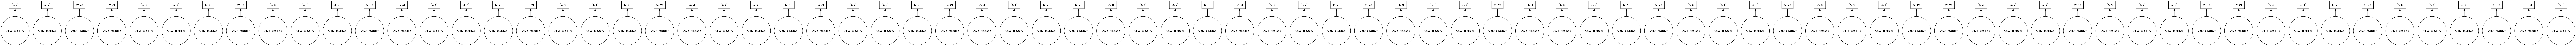

In [12]:
dst_ds.Oa13_radiance.data.visualize()

In [13]:
encoding = {name: dict(chunks=tuple(var.chunks[i][0] for i in (-2, -1))) for name, var in dst_ds.data_vars.items()}
encoding

{'Oa13_radiance': {'chunks': (1024, 2048)}}

In [14]:
t1 = time.perf_counter()
# dst_ds.to_zarr('test.zarr', encoding=encoding)
t2 = time.perf_counter()

In [15]:
t2 - t1

6.8999999996322e-05

In [16]:
dst_ds.Oa13_radiance.plot.imshow(figsize=(16,16), vmax=40, cmap='Greys_r')

D:\Miniconda3\envs\xcube\lib\site-packages\xarray\core\nputils.py:223: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
D:\Miniconda3\envs\xcube\lib\site-packages\xarray\core\nputils.py:223: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
D:\Miniconda3\envs\xcube\lib\site-packages\xarray\core\nputils.py:223: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


chunk Oa13_radiance-(0, 3), shape (1024, 2048) took 10.689767499999988, 0.04336990000000185, 5.520428100000004 seconds, total 16.253565499999993
chunk Oa13_radiance-(0, 6), shape (1024, 2048) took 10.31087190000001, 0.1754988999999938, 5.755699699999994 seconds, total 16.242070499999997
chunk Oa13_radiance-(0, 5), shape (1024, 2048) took 10.070463500000002, 0.09898249999999109, 6.3656577 seconds, total 16.535103699999993chunk Oa13_radiance-(0, 4), shape (1024, 2048) took 11.338722500000003, 0.05070419999999842, 5.149773499999995 seconds, total 16.539200199999996



D:\Miniconda3\envs\xcube\lib\site-packages\xarray\core\nputils.py:223: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


chunk Oa13_radiance-(1, 1), shape (1024, 2048) took 9.842188100000001, 0.1621113000000065, 0.6949443000000031 seconds, total 10.699243700000011
chunk Oa13_radiance-(1, 0), shape (1024, 2048) took 9.9239812, 0.800254300000006, 0.5289245999999963 seconds, total 11.253160100000002
chunk Oa13_radiance-(1, 2), shape (1024, 2048) took 9.666353999999998, 0.05207599999999957, 0.8620676000000032 seconds, total 10.580497600000001
chunk Oa13_radiance-(1, 4), shape (1024, 2048) took 10.617716999999999, 0.20251679999999794, 1.3916789999999963 seconds, total 12.211912799999993
chunk Oa13_radiance-(1, 3), shape (1024, 2048) took 10.752409200000002, 1.481217700000002, 1.0613396999999907 seconds, total 13.294966599999995
chunk Oa13_radiance-(1, 5), shape (1024, 2048) took 10.749019900000008, 2.5661150999999904, 1.3683087 seconds, total 14.683443699999998
chunk Oa13_radiance-(1, 6), shape (1024, 2048) took 10.93801280000001, 0.11173889999999176, 1.5743865000000028 seconds, total 12.624138200000004
chunk